In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

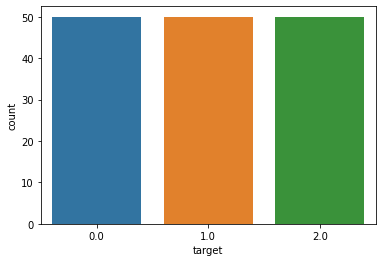

In [24]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
sns.countplot(x='target', data = df)

In [30]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:, :4], df.iloc[:, 4], test_size=0.33, random_state=101)

In [33]:
normalizer = Normalizer()

X_train = normalizer.fit_transform(x_train)
X_test = normalizer.transform(x_test)

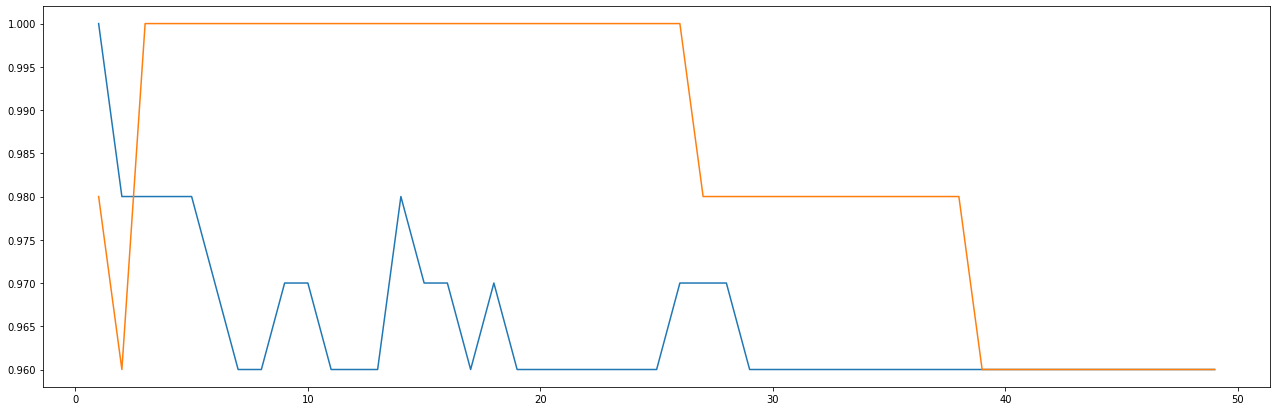

In [52]:
i_list = []
accuracy_test_list = []
accuracy_train_list = []
for i in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    i_list.append(i)

    accuracy_test_list.append(metrics.accuracy_score(Y_test, y_pred))
    accuracy_train_list.append(metrics.accuracy_score(Y_train, y_train_pred))

plt.figure(figsize = (22, 7))
plt.plot(i_list, accuracy_train_list)
plt.plot(i_list, accuracy_test_list)
plt.show()

In [53]:
clf = KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, y_pred)}')
print(f'Root Mean Squared Error: { np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}')
print(f'R2(train): {metrics.r2_score(Y_train, y_train_pred)}')
print(f'R2(test): {metrics.r2_score(Y_test, y_pred)}')

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2(train): 0.9722067815453029
R2(test): 1.0


In [64]:
df1 = pd.read_csv('solubility_stud.csv',index_col=0)
df1.info

<bound method DataFrame.info of                                 MolLogP  ...  measured log(solubility:mol/L)
Compound ID                              ...                                
1,1,1,2-Tetrachloroethane       2.59540  ...                          -2.180
1,1,1-Trichloroethane           2.37650  ...                          -2.000
1,1,2,2-Tetrachloroethane       2.59380  ...                          -1.740
1,1,2-Trichloroethane           2.02890  ...                          -1.480
1,1,2-Trichlorotrifluoroethane  2.91890  ...                          -3.040
...                                 ...  ...                             ...
vamidothion                     1.98820  ...                           1.144
Vinclozolin                     3.42130  ...                          -4.925
Warfarin                        3.60960  ...                          -3.893
Xipamide                        2.56214  ...                          -3.790
XMC                             2.02164  ...

In [56]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:, :4], df.iloc[:, 4], test_size=0.33, random_state=101)

In [58]:
normalizer = Normalizer()

X_train = normalizer.fit_transform(x_train)
X_test = normalizer.transform(x_test)

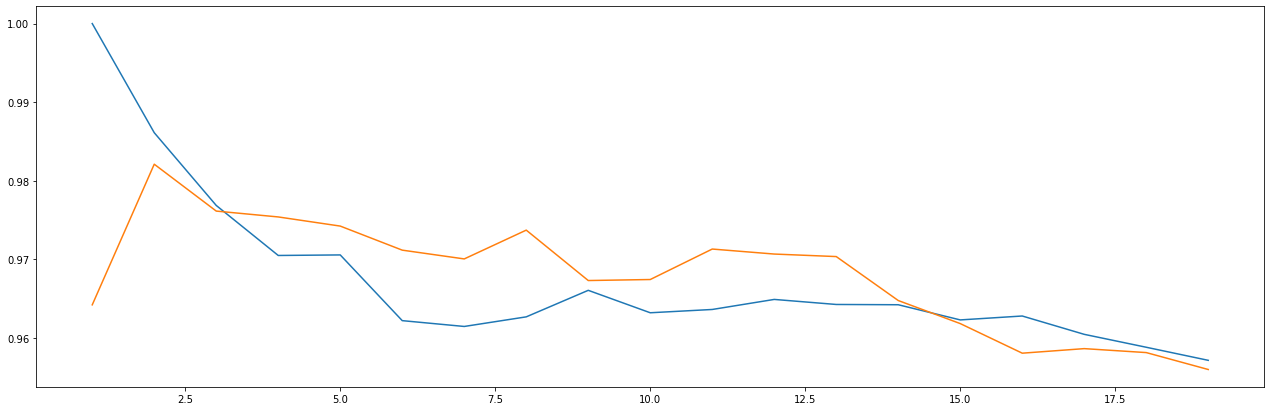

In [62]:
i_list = []
r2_test_list = []
r2_train_list = []
for i in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=i)
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    i_list.append(i)

    r2_test_list.append(metrics.r2_score(Y_test, y_pred))
    r2_train_list.append(metrics.r2_score(Y_train, y_train_pred))

plt.figure(figsize = (22, 7))
plt.plot(i_list, r2_train_list)
plt.plot(i_list, r2_test_list)
plt.show()

In [65]:
model = KNeighborsRegressor(n_neighbors=16)
model.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, y_pred)}')
print(f'Root Mean Squared Error: { np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}')
print(f'R2(train): {metrics.r2_score(Y_train, y_train_pred)}')
print(f'R2(test): {metrics.r2_score(Y_test, y_pred)}')

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2(train): 0.9722067815453029
R2(test): 1.0
